# Proyecto Grupal - Etapa 03: Análisis Exploratorio
Autores:
Camila de la Paz
Daniel E. Ramírez
Franco Pes
Xavier Vidman

El presente archivo compila la tercera etapa del primer proyecto grupal de la carrera de Data Science de Henry, un análisis exploratorio sobre los datos proporcionados. Esta etapa se divide, a su vez, en los pasos que se detallan a continuación:
1. Importación de liberías a utilizar
2. Carga de datos
3. Descripción y análisis de los datos
4. Consideraciones finales

### Paso 1: Importación de librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

### Paso 2: Carga de datos


In [2]:
df = pd.read_parquet ('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2018-01.parquet')

### Paso 3: Descripción y análisis
Información general

In [9]:
df.info(null_counts=True)

C:\Users\urbda\AppData\Local\Temp\ipykernel_7508\1982639406.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760687 entries, 0 to 8760686
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               8760687 non-null  int64         
 1   tpep_pickup_datetime   8760687 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  8760687 non-null  datetime64[ns]
 3   passenger_count        8760687 non-null  int64         
 4   trip_distance          8760687 non-null  float64       
 5   RatecodeID             8760687 non-null  int64         
 6   store_and_fwd_flag     8760687 non-null  object        
 7   PULocationID           8760687 non-null  int64         
 8   DOLocationID           8760687 non-null  int64         
 9   payment_type           8760687 non-null  int64         
 10  fare_amount            8760687 non-null  float64       
 11  extra                  8760687 non-null  float64       
 12  mta_tax                87606

In [4]:
df.head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.50,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,NaN
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.70,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30,NaN,NaN
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.80,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30,NaN,NaN
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.20,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80,NaN,NaN
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.50,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55,NaN,NaN
5,1,2018-01-01 00:29:29,2018-01-01 00:32:48,3,0.50,1,N,143,143,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,NaN
6,1,2018-01-01 00:38:08,2018-01-01 00:48:24,2,1.70,1,N,50,239,1,9.0,0.5,0.5,2.05,0.0,0.3,12.35,NaN,NaN
7,1,2018-01-01 00:49:29,2018-01-01 00:51:53,1,0.70,1,N,239,238,1,4.0,0.5,0.5,1.00,0.0,0.3,6.30,NaN,NaN
8,1,2018-01-01 00:56:38,2018-01-01 01:01:05,1,1.00,1,N,238,24,1,5.5,0.5,0.5,1.70,0.0,0.3,8.50,NaN,NaN
9,1,2018-01-01 00:17:04,2018-01-01 00:22:24,1,0.70,1,N,170,170,2,5.5,0.5,0.5,0.00,0.0,0.3,6.80,NaN,NaN


Valores faltantes

In [22]:
# El siguiente método se empleará para plotear valores porcentuales sobre gráficos de barra

def without_hue(ax, feature,centering):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - centering
        y = 5
        ax.annotate(percentage, (x, y), size = 12)

In [12]:
valores_faltantes = df.isnull().sum()
valores_faltantes = valores_faltantes[valores_faltantes > 0]
valores_faltantes

congestion_surcharge    8760675
airport_fee             8760675
dtype: int64

In [43]:
df[~df.congestion_surcharge.isna()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
2757790,1,2018-01-11 22:26:54,2018-01-11 22:47:58,1,2.1,1,Y,141,238,1,14.5,2.5,0.5,2.56,0.0,0.3,20.36,2.5,0.0
2775061,1,2018-01-11 23:56:19,2018-01-12 00:03:56,1,1.0,1,Y,186,234,1,7.0,2.5,0.5,2.05,0.0,0.3,12.35,2.5,0.0
2788636,1,2018-01-12 00:47:17,2018-01-12 00:55:40,1,1.8,1,Y,239,43,1,8.5,2.5,0.5,2.35,0.0,0.3,14.15,2.5,0.0
2797515,1,2018-01-12 01:06:08,2018-01-12 01:08:21,1,0.4,1,Y,237,237,1,3.5,2.5,0.5,1.70,0.0,0.3,8.50,2.5,0.0
2797516,1,2018-01-12 01:36:42,2018-01-12 01:59:20,1,4.4,1,Y,249,263,1,17.5,2.5,0.5,4.15,0.0,0.3,24.95,2.5,0.0
2802926,1,2018-01-12 02:12:13,2018-01-12 02:32:56,1,3.0,1,Y,236,107,1,15.0,2.5,0.5,0.00,0.0,0.3,18.30,2.5,0.0
2806273,1,2018-01-12 03:04:33,2018-01-12 03:20:42,1,1.6,1,Y,90,170,1,11.5,2.5,0.5,2.95,0.0,0.3,17.75,2.5,0.0
2806274,1,2018-01-12 03:43:43,2018-01-12 03:52:47,1,1.4,1,Y,236,239,1,8.0,2.5,0.5,2.80,0.0,0.3,14.10,2.5,0.0
2808670,1,2018-01-12 04:02:35,2018-01-12 04:08:34,1,0.7,1,Y,48,230,1,6.0,2.5,0.5,2.75,0.0,0.3,12.05,2.5,0.0
2808671,1,2018-01-12 04:27:46,2018-01-12 04:34:35,1,1.1,1,Y,68,158,1,6.5,2.5,0.5,0.80,0.0,0.3,10.60,2.5,0.0


In [13]:
valores_faltantes = valores_faltantes.to_frame()
valores_faltantes.columns = ['Cantidad']
valores_faltantes.index.names = ['Campo']
valores_faltantes['Campo'] = valores_faltantes.index

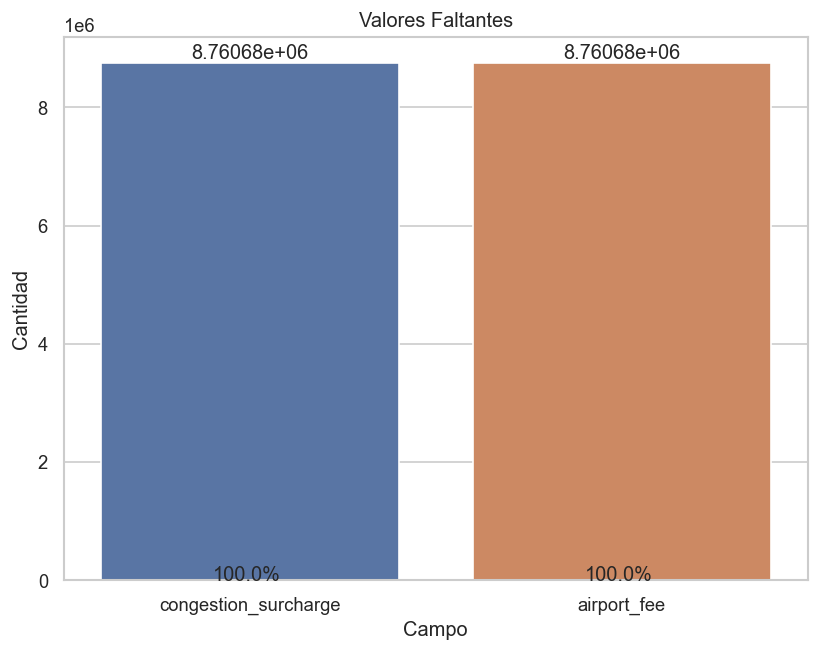

In [71]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.barplot(x = 'Campo', y = 'Cantidad', data=valores_faltantes)
plt.bar_label(splot.containers[0])
without_hue (splot,df,0.1)
plt.title('Valores Faltantes')
plt.show()

Valores Duplicados

In [60]:
df.duplicated().sum()

1

In [57]:
df[df.duplicated()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
3861553,2,2018-01-15 16:15:02,2018-01-15 16:15:04,5,0.06,1,N,264,138,2,2.5,0.0,0.5,0.0,0.0,0.3,3.3,NaN,NaN


In [59]:
df[(df.tpep_pickup_datetime == '2018-01-15 16:15:02') & (df.tpep_dropoff_datetime == '2018-01-15 16:15:04')]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
3861550,2,2018-01-15 16:15:02,2018-01-15 16:15:04,5,0.06,1,N,264,138,2,2.5,0.0,0.5,0.0,0.0,0.3,3.3,NaN,NaN
3861553,2,2018-01-15 16:15:02,2018-01-15 16:15:04,5,0.06,1,N,264,138,2,2.5,0.0,0.5,0.0,0.0,0.3,3.3,NaN,NaN


a) Campo VendorID

In [23]:
df.VendorID.unique()

array([1, 2], dtype=int64)

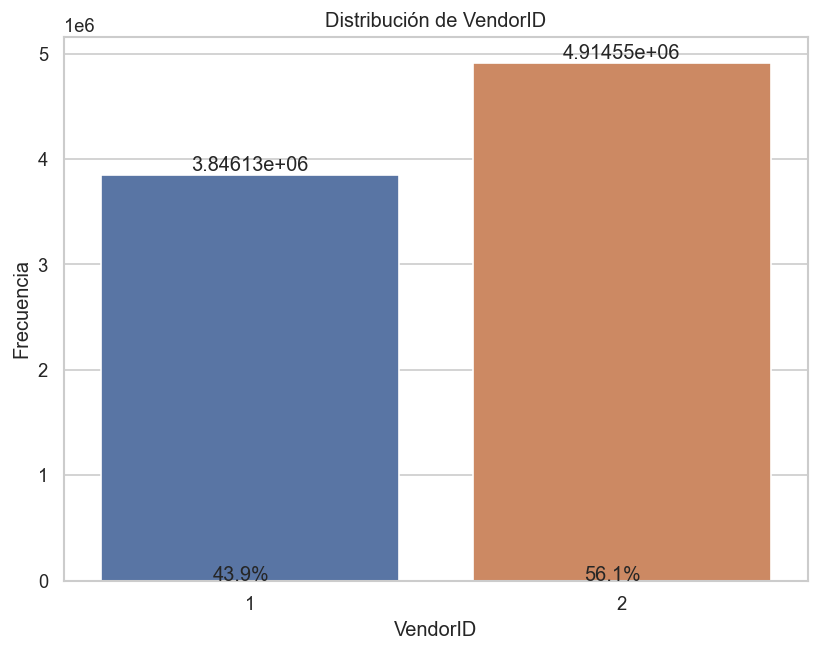

In [70]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.countplot(x = 'VendorID',data=df)
plt.bar_label(splot.containers[0])
plt.ylabel('Frecuencia')
without_hue (splot,df,0.1)
plt.title('Distribución de VendorID')
plt.show()

b) Campo passenger_count

In [61]:
df.passenger_count.unique()

array([1, 2, 3, 5, 4, 6, 0, 7, 8, 9], dtype=int64)

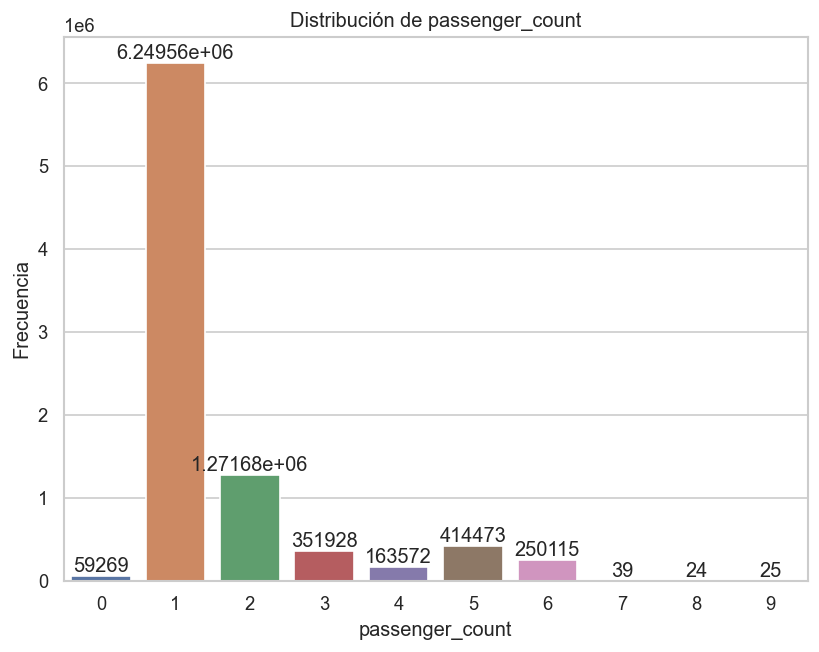

In [45]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.countplot(x = 'passenger_count',data=df)
plt.bar_label(splot.containers[0])
plt.ylabel('Frecuencia')
plt.title('Distribución de passenger_count')
plt.show()

El reglamento de taxis amarillos indica que máximo puede haber 4 pasajeros en vehículos de 4 pasajeros y 5 pasajeros en vehículos de 5 pasajeros. Hay más de 250 mil registros con 6 pasajeros o más

c) Campo trip_distance

In [74]:
df.trip_distance.describe()

count    8.760687e+06
mean     2.804022e+00
std      6.412050e+01
min      0.000000e+00
25%      9.100000e-01
50%      1.550000e+00
75%      2.840000e+00
max      1.894838e+05
Name: trip_distance, dtype: float64

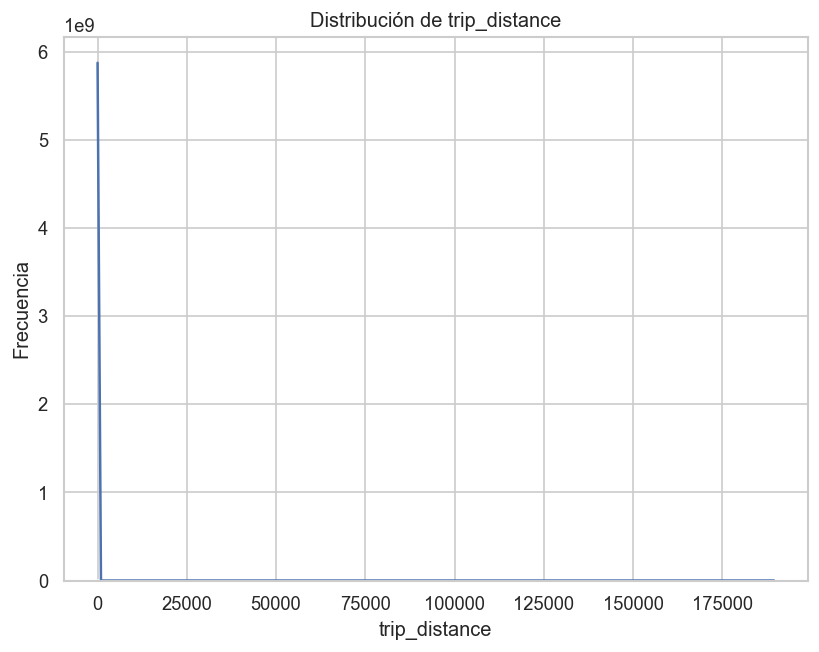

In [3]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'trip_distance',data=df,bins=30,kde=True)
plt.ylabel('Frecuencia')
plt.title('Distribución de trip_distance')
plt.show()

Al observar la distribución de los datos se detectó la presencia de outliers. Se procedió entonces a calcular en base al rango intercuartílico

In [17]:
IQR = df.trip_distance.quantile(.75) - df.trip_distance.quantile(.25)
min = df.trip_distance.quantile(.25) - (1.5 * IQR)
max = df.trip_distance.quantile(.75) + (1.5 * IQR)

In [6]:
df.trip_distance[df.trip_distance < min].count()

0

In [7]:
df.trip_distance[df.trip_distance > max].count()

970323

In [11]:
df.trip_distance[df.trip_distance < max].describe()

count    7.790364e+06
mean     1.715536e+00
std      1.164348e+00
min      0.000000e+00
25%      8.800000e-01
50%      1.400000e+00
75%      2.240000e+00
max      5.730000e+00
Name: trip_distance, dtype: float64

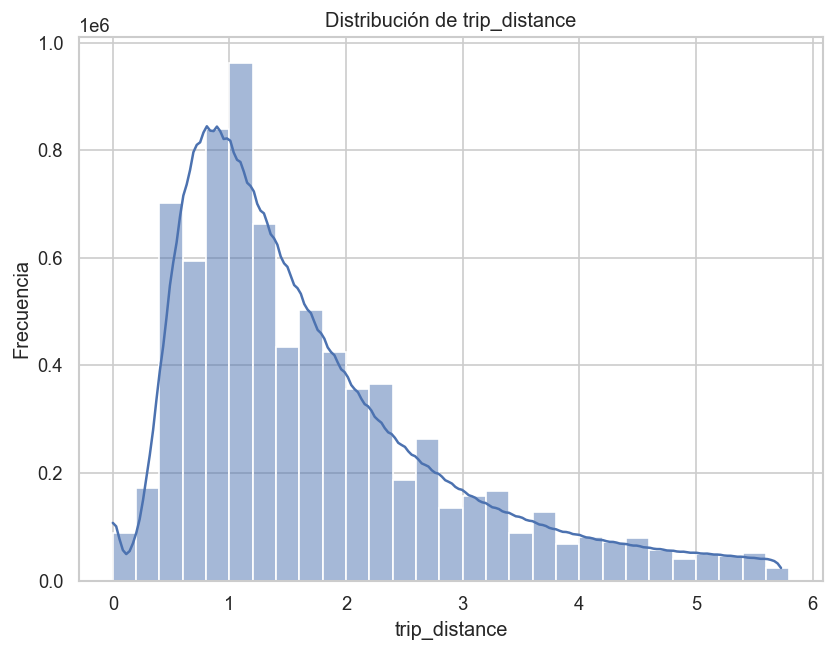

In [13]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'trip_distance',data=df[df.trip_distance <= max],binwidth=0.2,kde=True)
plt.ylabel('Frecuencia')
plt.title('Distribución de trip_distance sin outliers')
plt.show()

In [28]:
df[df.trip_distance > 25].count()

VendorID                 358
tpep_pickup_datetime     358
tpep_dropoff_datetime    358
passenger_count          358
trip_distance            358
RatecodeID               358
store_and_fwd_flag       358
PULocationID             358
DOLocationID             358
payment_type             358
fare_amount              358
extra                    358
mta_tax                  358
tip_amount               358
tolls_amount             358
improvement_surcharge    358
total_amount             358
congestion_surcharge       0
airport_fee                0
dtype: int64

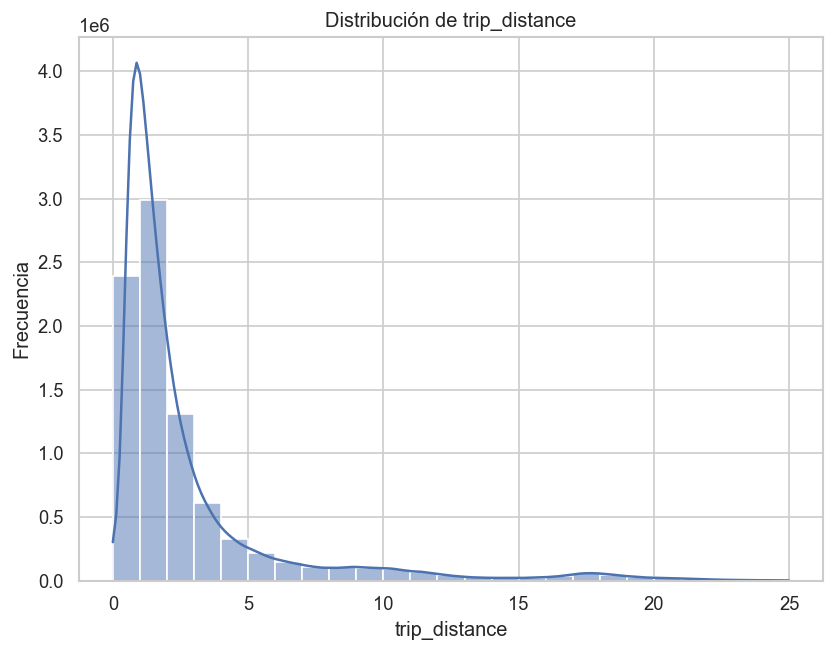

In [3]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'trip_distance',data=df[df.trip_distance < 25],binwidth=1,kde=True)
plt.ylabel('Frecuencia')
plt.title('Distribución de trip_distance menores a 25 millas')
plt.show()

In [31]:
df[df.trip_distance > 400]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
1858262,1,2018-01-08 19:44:54,2018-01-08 19:50:00,0,830.80,1,N,100,230,1,5.5,1.0,0.5,1.8,0.00,0.3,9.10,NaN,NaN
2994332,2,2018-01-12 17:36:09,2018-01-13 04:50:42,1,484.91,4,N,132,265,2,2409.0,1.0,0.5,0.0,7.01,0.3,2417.81,NaN,NaN
8237763,2,2018-01-30 11:41:02,2018-01-30 11:42:09,1,189483.84,1,N,193,193,2,4.0,0.0,0.0,0.0,0.00,0.0,4.00,NaN,NaN


Es imposible que un viaje haya tenido 189483.84 millas de distancia y haya durado 1 minuto con 7 segundos. Lo mismo con el viaje de 830 millas

In [26]:
dic_calidad =  {'Outliers': df.trip_distance[df.trip_distance > max].count(),
                'Sin errores': df.trip_distance.count() - df.trip_distance[df.trip_distance > max].count()}
df_calidad = pd.DataFrame(list(dic_calidad.items()),columns = ['Estado', 'Cantidad'])

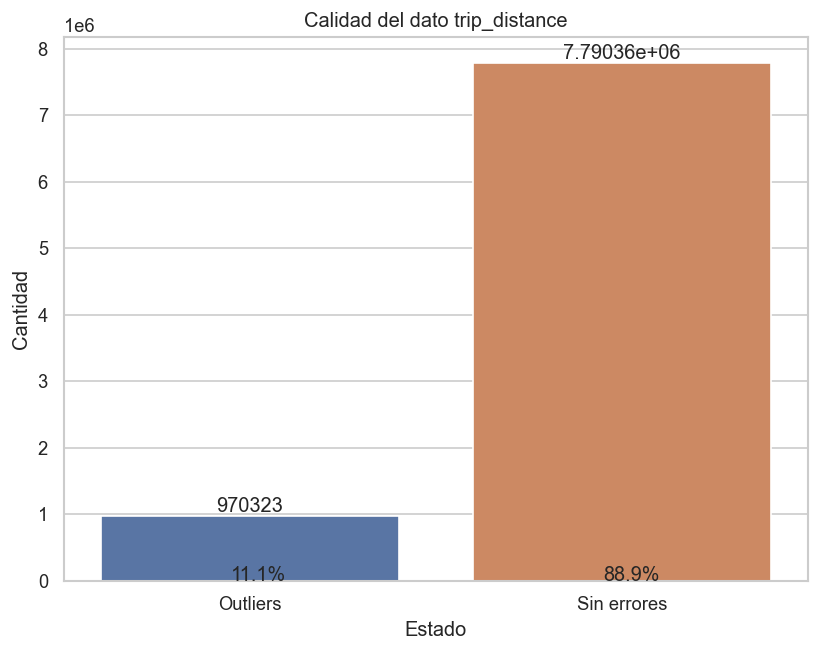

In [29]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.barplot(x = df_calidad['Estado'],y = 'Cantidad', data = df_calidad)
plt.bar_label(splot.containers[0])
without_hue (splot,df.trip_distance,0.05)
plt.title('Calidad del dato trip_distance')
plt.show()

In [6]:
df[df.trip_distance < df.trip_distance.quantile(.99)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.50,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,NaN
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.70,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30,NaN,NaN
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.80,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30,NaN,NaN
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.20,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80,NaN,NaN
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.50,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8760682,1,2018-01-31 23:21:35,2018-01-31 23:34:20,2,2.80,1,N,158,163,1,12.0,0.5,0.5,2.65,0.0,0.3,15.95,NaN,NaN
8760683,1,2018-01-31 23:35:51,2018-01-31 23:38:57,1,0.60,1,N,163,162,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95,NaN,NaN
8760684,2,2018-01-31 23:28:00,2018-01-31 23:37:09,1,2.95,1,N,74,69,2,10.5,0.5,0.5,0.00,0.0,0.3,11.80,NaN,NaN
8760685,2,2018-01-31 23:24:40,2018-01-31 23:25:28,1,0.00,1,N,7,193,2,0.0,0.0,0.0,0.00,0.0,0.0,0.00,NaN,NaN


d) Campo RateCodeID

In [32]:
df.RatecodeID.unique()

array([ 1,  2,  5,  4,  3,  6, 99], dtype=int64)

In [12]:
df[df.RatecodeID == 99]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
63490,1,2018-01-01 03:38:10,2018-01-01 03:38:10,0,0.0,99,N,264,264,1,28.00,0.0,0.5,0.00,0.0,0.3,28.80,NaN,NaN
133406,1,2018-01-01 13:39:03,2018-01-01 13:39:03,0,0.0,99,N,264,264,1,85.00,0.0,0.0,0.00,0.0,0.0,85.00,NaN,NaN
263621,1,2018-01-02 07:44:13,2018-01-02 07:44:13,0,0.0,99,N,264,264,3,12.35,0.0,0.0,0.00,0.0,0.0,12.35,NaN,NaN
263622,1,2018-01-02 07:45:52,2018-01-02 07:45:52,0,0.0,99,N,264,264,3,12.35,0.0,0.0,0.00,0.0,0.0,12.35,NaN,NaN
263623,1,2018-01-02 07:47:19,2018-01-02 07:47:19,0,0.0,99,N,264,264,1,12.35,0.0,0.0,0.00,0.0,0.0,12.35,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8516724,1,2018-01-31 09:15:45,2018-01-31 09:15:45,0,0.0,99,N,264,264,1,5.00,0.5,0.0,0.00,0.0,0.3,5.80,NaN,NaN
8562741,1,2018-01-31 12:12:42,2018-01-31 12:12:42,0,0.0,99,Y,79,264,3,11.31,0.0,0.0,0.00,0.0,0.0,11.31,NaN,NaN
8562742,1,2018-01-31 12:53:23,2018-01-31 12:53:23,0,0.0,99,Y,234,264,3,17.80,0.0,0.0,0.00,0.0,0.0,17.80,NaN,NaN
8565401,1,2018-01-31 13:59:15,2018-01-31 13:59:15,0,0.0,99,N,264,264,1,31.00,0.3,0.5,0.00,0.0,0.0,31.80,NaN,NaN


Se encontraron 106 registros con un valor igual a 99, el cual no está definido en el diccionario de datos

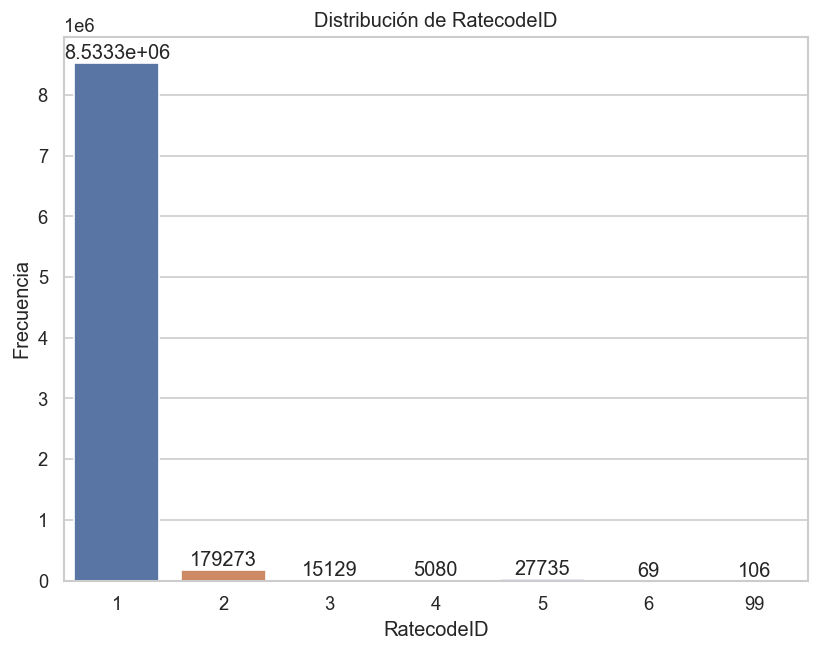

In [10]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.countplot(x = 'RatecodeID',data=df)
plt.bar_label(splot.containers[0])
plt.ylabel('Frecuencia')
plt.title('Distribución de RatecodeID')
plt.show()

e) Campo store_and_fwd_flag

In [36]:
df.store_and_fwd_flag.unique()

array(['N', 'Y'], dtype=object)

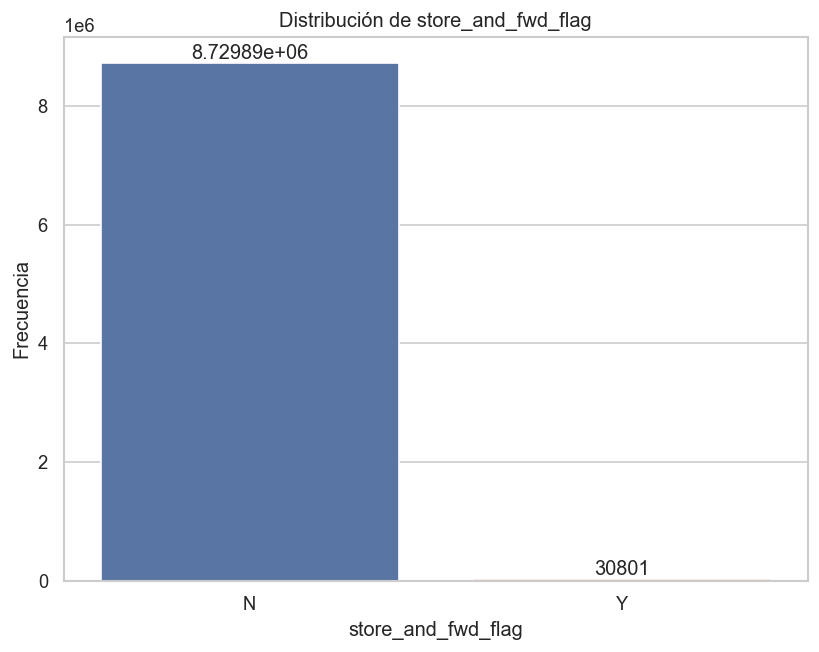

In [37]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.countplot(x = 'store_and_fwd_flag',data=df)
plt.bar_label(splot.containers[0])
plt.ylabel('Frecuencia')
plt.title('Distribución de store_and_fwd_flag')
plt.show()

f) Campo PULocationID

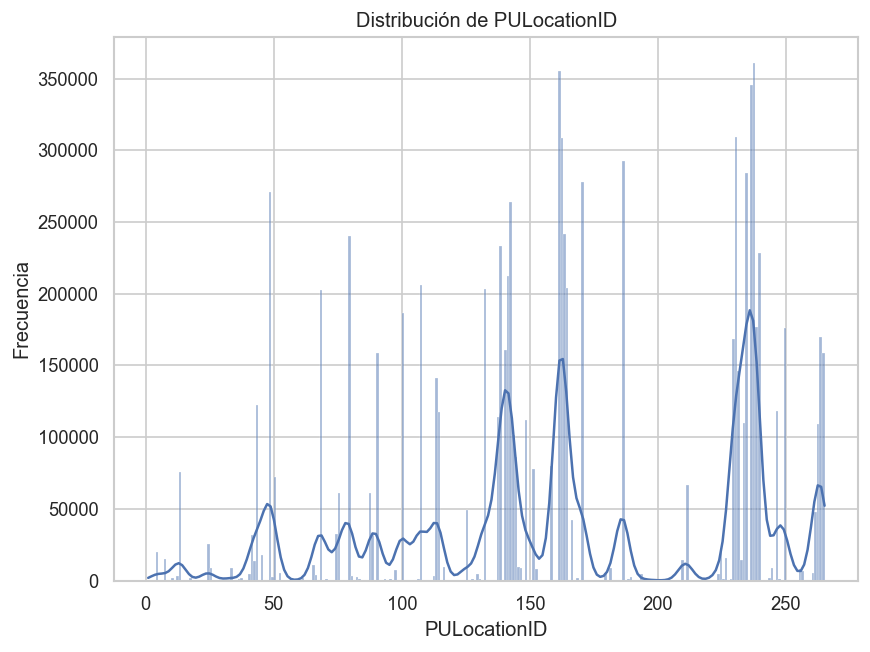

In [38]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'PULocationID',data=df,binwidth=1,kde=True)
plt.ylabel('Frecuencia')
plt.title('Distribución de PULocationID')
plt.show()

g) Campo DOLocationID

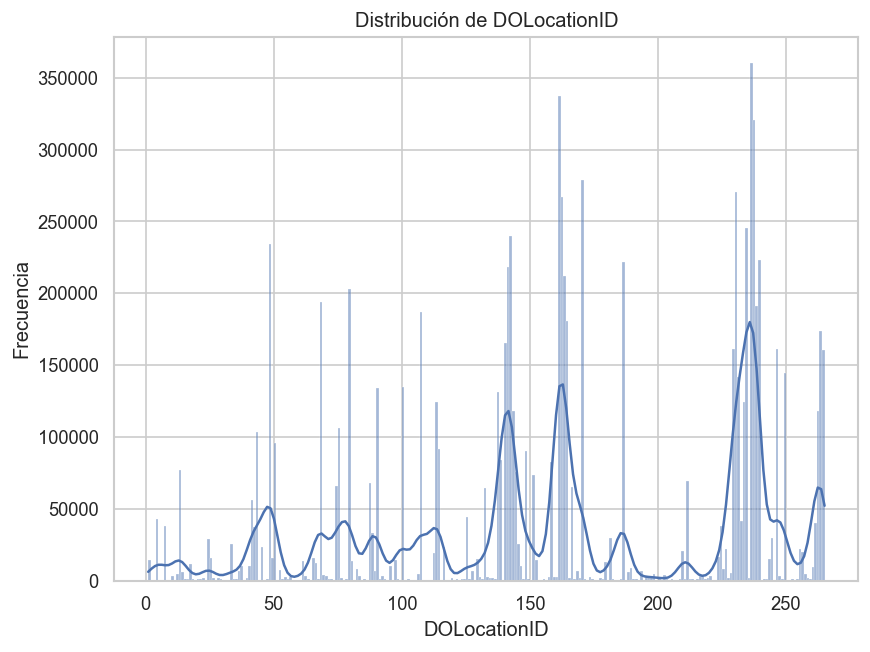

In [39]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'DOLocationID',data=df,binwidth=1,kde=True)
plt.ylabel('Frecuencia')
plt.title('Distribución de DOLocationID')
plt.show()

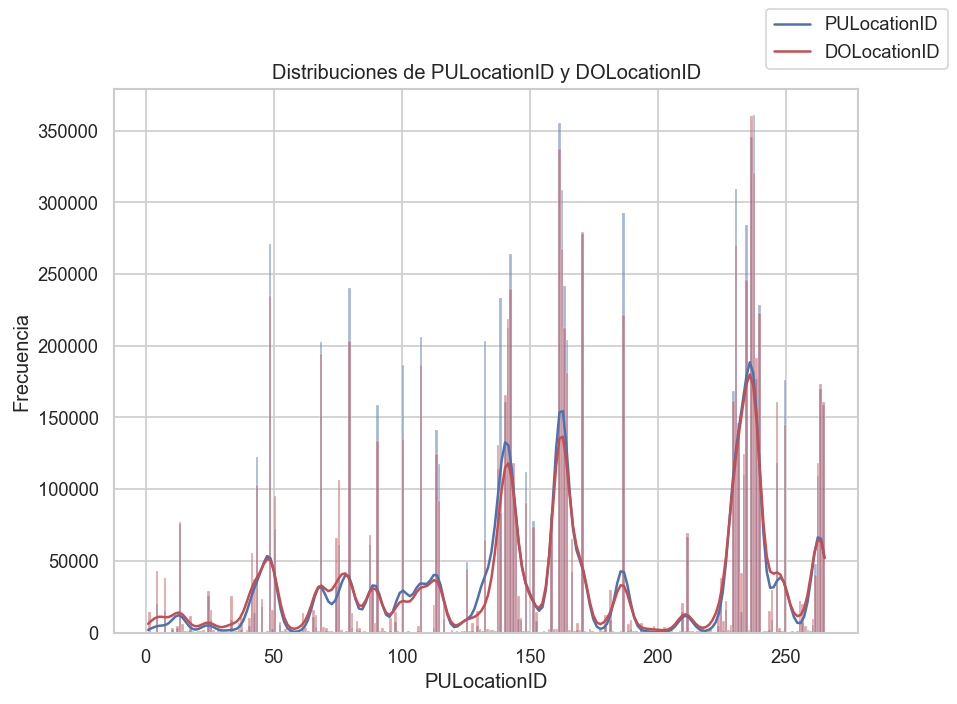

In [8]:
fig = plt.figure(figsize=(8, 6), dpi=120)
splot1 = sns.histplot(x = 'PULocationID',data=df,color='b',binwidth=1,kde=True)
splot2 = sns.histplot(x = 'DOLocationID',data=df,color='r',binwidth=1,kde=True)
plt.ylabel('Frecuencia')
fig.legend(labels=['PULocationID','DOLocationID'])
plt.title('Distribuciones de PULocationID y DOLocationID')
plt.show()

h) Campo payment_type

In [40]:
df.payment_type.unique()

array([2, 1, 4, 3], dtype=int64)

No hay registros con valores 5 o 6

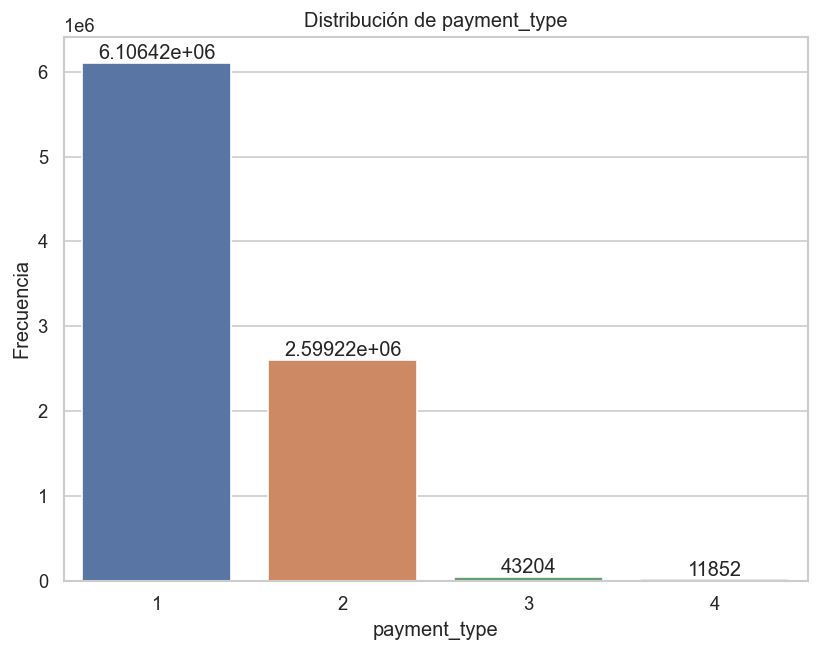

In [42]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.countplot(x = 'payment_type',data=df)
plt.bar_label(splot.containers[0])
plt.ylabel('Frecuencia')
plt.title('Distribución de payment_type')
plt.show()

i) Campo fare_amount

In [43]:
df.fare_amount.describe()

count    8.760687e+06
mean     1.224443e+01
std      1.168321e+01
min     -4.500000e+02
25%      6.000000e+00
50%      9.000000e+00
75%      1.350000e+01
max      8.016000e+03
Name: fare_amount, dtype: float64

In [44]:
df[df.fare_amount < 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
58,2,2018-01-01 01:02:39,2018-01-01 01:04:02,2,0.09,1,N,87,87,4,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,NaN,NaN
840,2,2018-01-01 00:38:19,2018-01-01 00:55:57,1,0.41,1,N,68,68,4,-11.0,-0.5,-0.5,0.0,0.0,-0.3,-12.3,NaN,NaN
3862,2,2018-01-01 00:46:31,2018-01-01 00:46:34,1,0.00,5,N,264,238,4,-13.8,0.0,0.0,0.0,0.0,-0.3,-14.1,NaN,NaN
4084,2,2018-01-01 00:47:40,2018-01-01 00:49:06,1,0.13,1,N,137,137,3,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,NaN,NaN
4242,2,2018-01-01 00:11:10,2018-01-01 00:15:14,1,0.16,1,N,137,170,4,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-5.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754678,2,2018-01-31 23:21:05,2018-01-31 23:24:44,1,0.69,1,N,164,234,3,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-5.8,NaN,NaN
8754757,2,2018-01-31 23:26:11,2018-01-31 23:26:46,2,0.03,1,N,68,246,4,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,NaN,NaN
8755958,2,2018-01-31 23:21:56,2018-01-31 23:21:59,1,0.00,1,N,264,112,4,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,NaN,NaN
8756003,2,2018-01-31 23:56:06,2018-01-31 23:57:06,2,0.12,1,N,246,246,4,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,NaN,NaN


Se encontraron 4260 registros con valores negativos

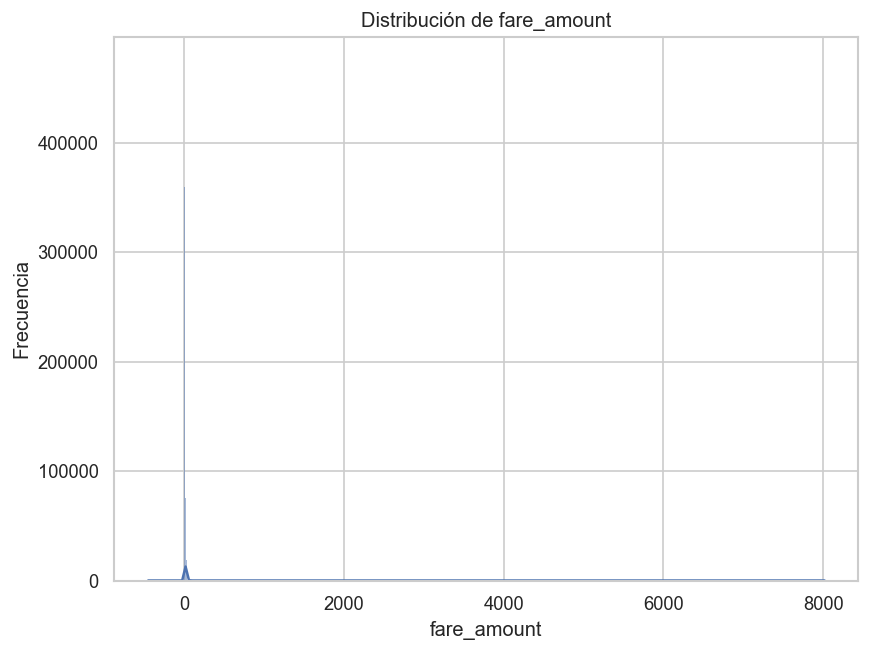

In [46]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'fare_amount',data=df,binwidth=0.1,kde=True)
plt.ylabel('Frecuencia')
plt.title('Distribución de fare_amount')
plt.show()

Presencia de outliers. Nuevamente, se procedió a calcular rango intercuartílico

In [112]:
IQR = df.fare_amount.quantile(.75) - df.fare_amount.quantile(.25)
min = df.fare_amount.quantile(.25) - (1.5 * IQR)
max = df.fare_amount.quantile(.75) + (1.5 * IQR)

In [113]:
df.fare_amount[df.fare_amount < min].count()

938

In [114]:
df.fare_amount[df.fare_amount > max].count()

788816

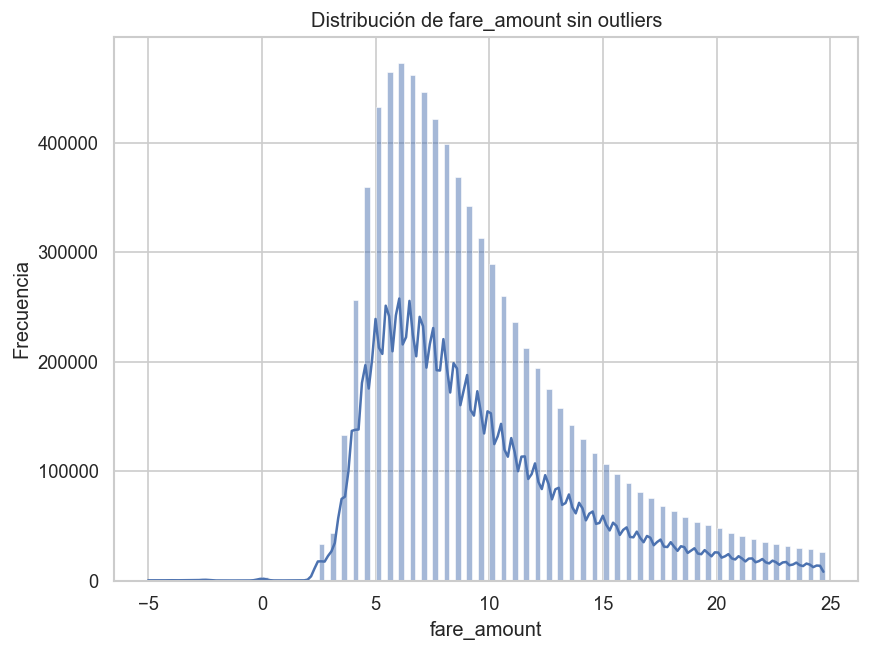

In [106]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'fare_amount',data=df[(df.fare_amount >= min) & (df.fare_amount <= max)],binwidth=0.25,kde=True)
plt.ylabel('Frecuencia')
plt.title('Distribución de fare_amount sin outliers')
plt.show()

In [115]:
dic_calidad =  {'Outliers': df.fare_amount[df.fare_amount < min].count() + df.fare_amount[df.fare_amount > max].count(),
                'Sin errores': df.fare_amount.count() - (df.fare_amount[df.fare_amount < min].count() + df.fare_amount[df.fare_amount > max].count())}
df_calidad = pd.DataFrame(list(dic_calidad.items()),columns = ['Estado', 'Cantidad'])

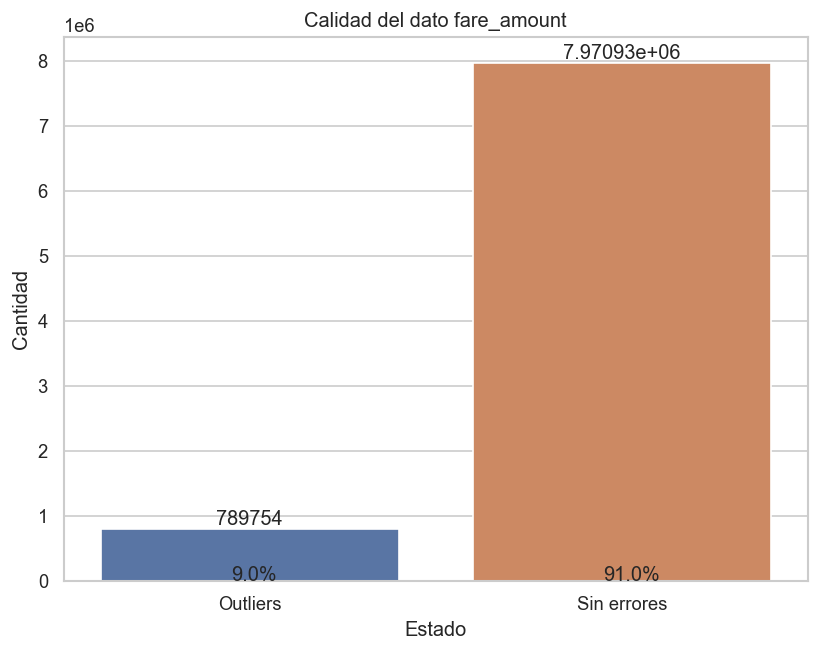

In [116]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.barplot(x = df_calidad['Estado'],y = 'Cantidad', data = df_calidad)
plt.bar_label(splot.containers[0])
without_hue (splot,df.trip_distance,0.05)
plt.title('Calidad del dato fare_amount')
plt.show()

j) Campo extra

In [57]:
df.extra.nunique()

42

In [66]:
df.extra.describe()

count    8.760687e+06
mean     3.246882e-01
std      4.502555e-01
min     -4.469000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e-01
max      6.000000e+01
Name: extra, dtype: float64

Nuevamente, hay valores negativos

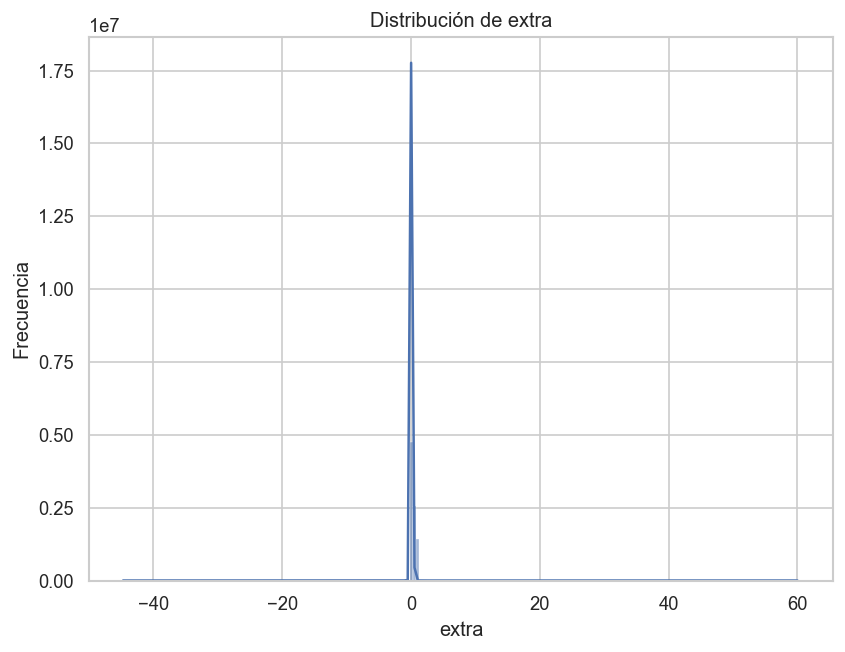

In [58]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'extra',data=df,binwidth=0.5,kde=True)
plt.ylabel('Frecuencia')
plt.title('Distribución de extra')
plt.show()

In [117]:
IQR = df.extra.quantile(.75) - df.extra.quantile(.25)
min = df.extra.quantile(.25) - (1.5 * IQR)
max = df.extra.quantile(.75) + (1.5 * IQR)

In [110]:
df.extra[df.extra < min].count()

618

In [111]:
df.extra[df.extra > max].count()

30744

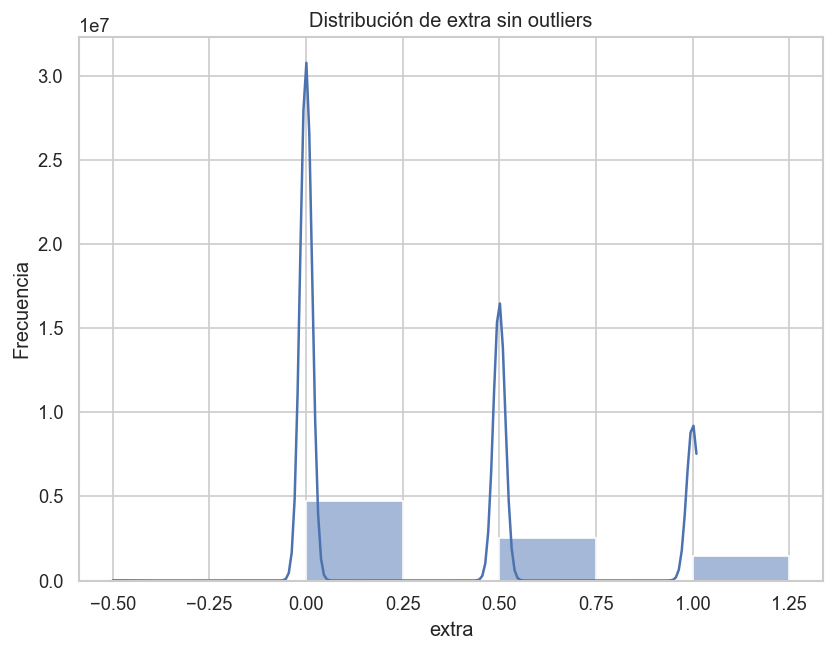

In [63]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'extra',data=df[(df.extra > min) & (df.extra < max)],binwidth=0.25,kde=True)
plt.ylabel('Frecuencia')
plt.title('Distribución de extra sin outliers')
plt.show()

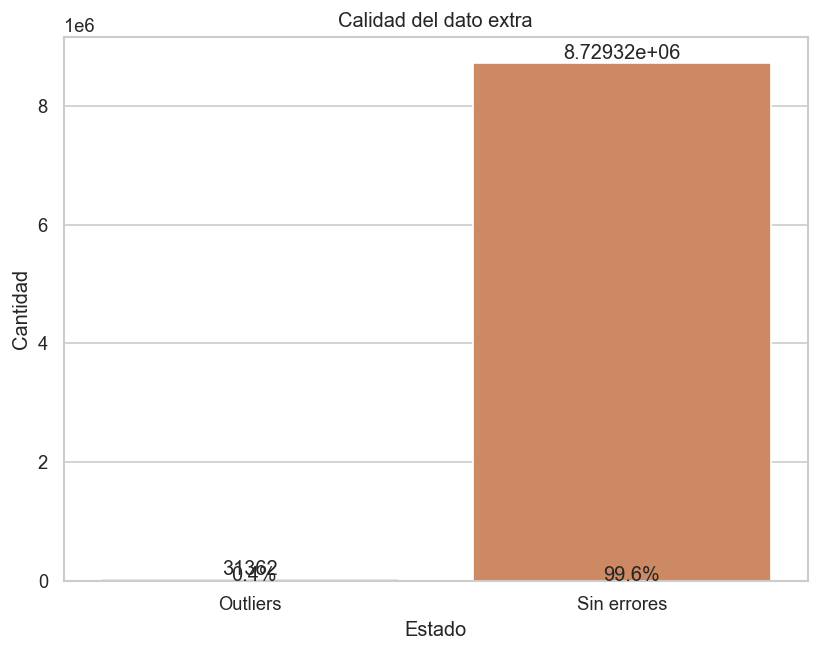

In [118]:
dic_calidad =  {'Outliers': df.extra[df.extra < min].count() + df.extra[df.extra > max].count(),
                'Sin errores': df.extra.count() - (df.extra[df.extra < min].count() + df.extra[df.extra > max].count())}
df_calidad = pd.DataFrame(list(dic_calidad.items()),columns = ['Estado', 'Cantidad'])
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.barplot(x = df_calidad['Estado'],y = 'Cantidad', data = df_calidad)
plt.bar_label(splot.containers[0])
without_hue (splot,df.trip_distance,0.05)
plt.title('Calidad del dato extra')
plt.show()


k) Campo mta_tax

In [69]:
df.mta_tax.nunique()

15

In [67]:
df.mta_tax.describe()

count    8.760687e+06
mean     4.975066e-01
std      4.333281e-02
min     -5.000000e-01
25%      5.000000e-01
50%      5.000000e-01
75%      5.000000e-01
max      4.549000e+01
Name: mta_tax, dtype: float64

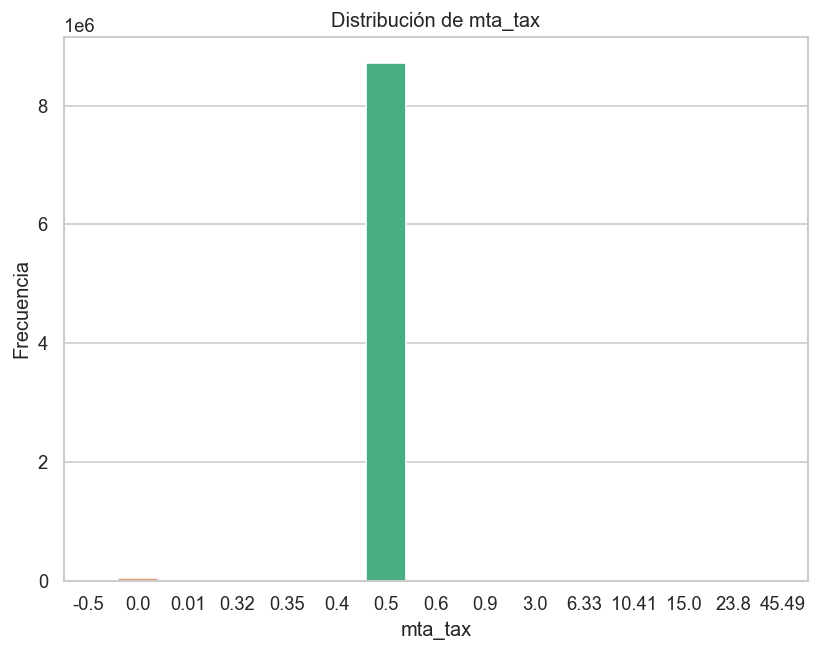

In [125]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.countplot(x = 'mta_tax',data=df)
plt.ylabel('Frecuencia')
plt.title('Distribución de mta_tax')
plt.show()

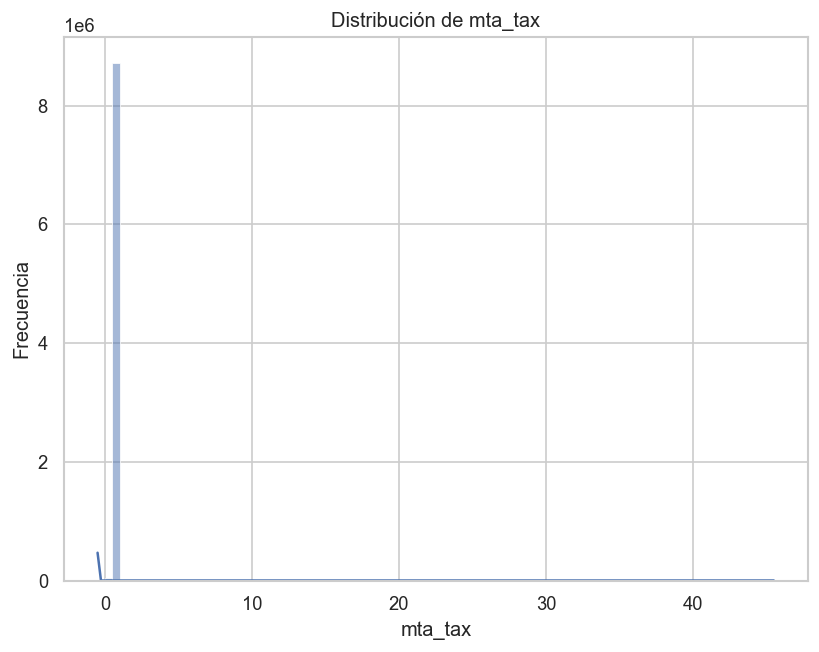

In [72]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'mta_tax',data=df,binwidth=0.5,kde=True)
plt.ylabel('Frecuencia')
plt.title('Distribución de mta_tax')
plt.show()

In [119]:
IQR = df.mta_tax.quantile(.75) - df.mta_tax.quantile(.25)
min = df.mta_tax.quantile(.25) - (1.5 * IQR)
max = df.mta_tax.quantile(.75) + (1.5 * IQR)

In [87]:
df.mta_tax[df.mta_tax < min].count()

40102

In [86]:
df.mta_tax[df.mta_tax > max].count()

80

In [89]:
df.mta_tax[(df.mta_tax >= min) & (df.mta_tax <= max)].nunique()

1

In [91]:
df.mta_tax[(df.mta_tax >= min) & (df.mta_tax <= max)].unique()

array([0.5])

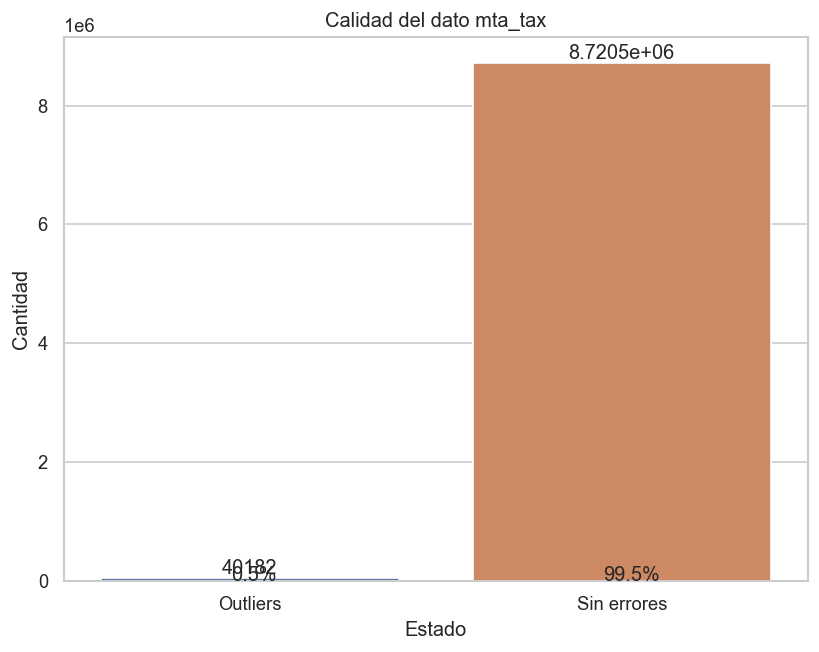

In [120]:
dic_calidad =  {'Outliers': df.mta_tax[df.mta_tax < min].count() + df.mta_tax[df.mta_tax > max].count(),
                'Sin errores': df.mta_tax.count() - (df.mta_tax[df.mta_tax < min].count() + df.mta_tax[df.mta_tax > max].count())}
df_calidad = pd.DataFrame(list(dic_calidad.items()),columns = ['Estado', 'Cantidad'])
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.barplot(x = df_calidad['Estado'],y = 'Cantidad', data = df_calidad)
plt.bar_label(splot.containers[0])
without_hue (splot,df.trip_distance,0.05)
plt.title('Calidad del dato mta_tax')
plt.show()

l) Campo tip_amount

In [94]:
df.tip_amount.describe()

count    8.760687e+06
mean     1.818759e+00
std      2.486375e+00
min     -8.880000e+01
25%      0.000000e+00
50%      1.360000e+00
75%      2.350000e+00
max      4.417100e+02
Name: tip_amount, dtype: float64

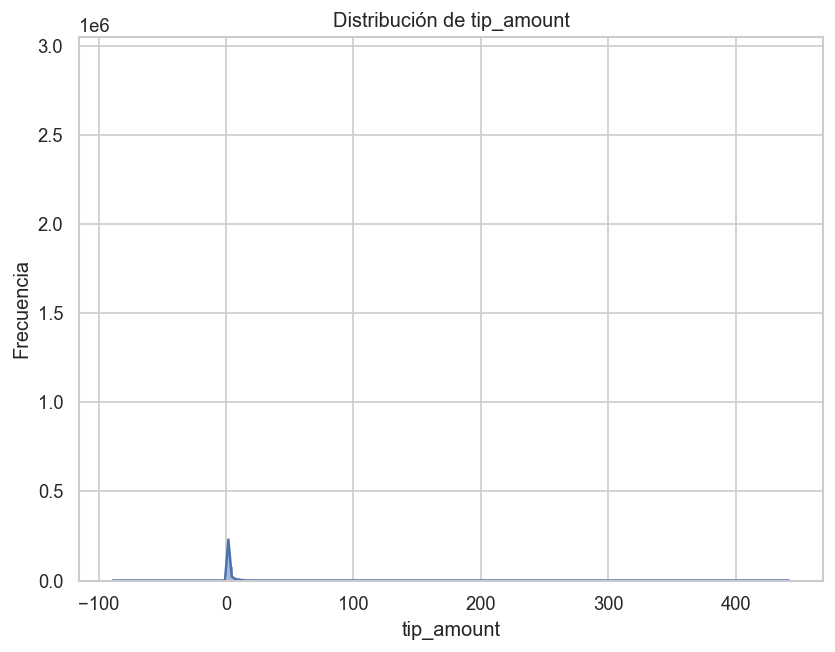

In [95]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'tip_amount',data=df,binwidth=0.1,kde=True)
plt.ylabel('Frecuencia')
plt.title('Distribución de tip_amount')
plt.show()

In [121]:
IQR = df.tip_amount.quantile(.75) - df.tip_amount.quantile(.25)
min = df.tip_amount.quantile(.25) - (1.5 * IQR)
max = df.tip_amount.quantile(.75) + (1.5 * IQR)

In [123]:
df.tip_amount[df.tip_amount < min].count()

5

In [124]:
df.tip_amount[df.tip_amount > max].count()

465853

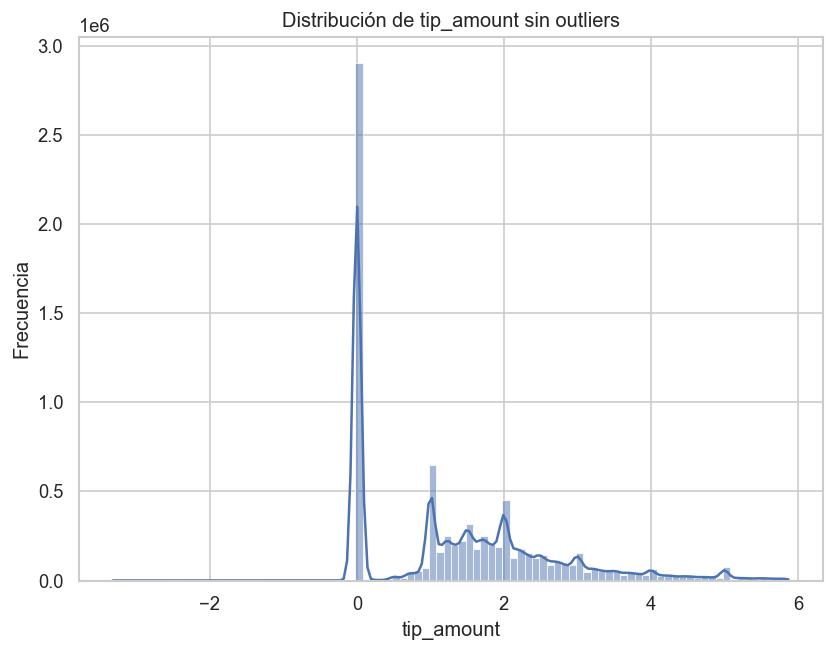

In [127]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'tip_amount',data=df[(df.tip_amount >= min) & (df.tip_amount <= max)],binwidth=0.1,kde=True)
plt.ylabel('Frecuencia')
plt.title('Distribución de tip_amount sin outliers')
plt.show()

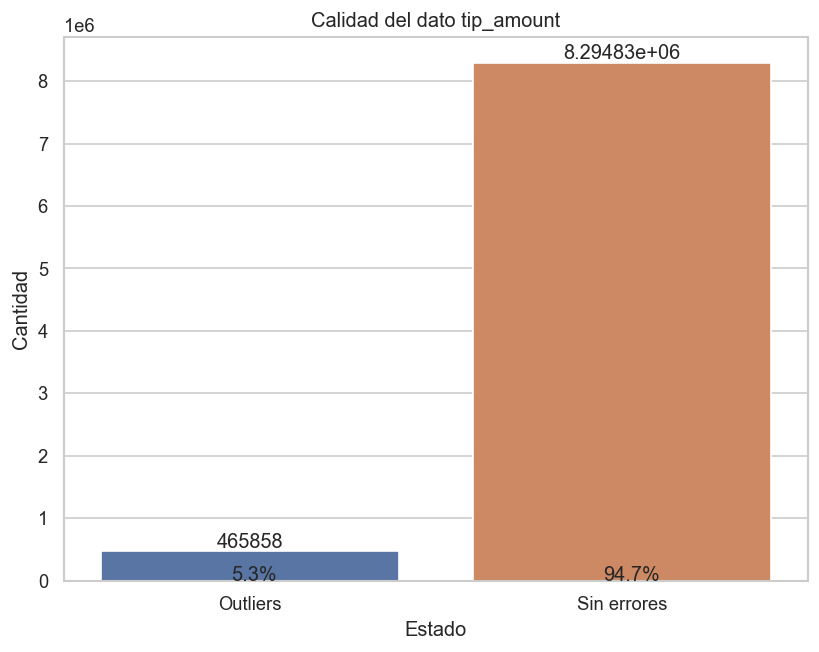

In [128]:
dic_calidad =  {'Outliers': df.tip_amount[df.tip_amount < min].count() + df.tip_amount[df.tip_amount > max].count(),
                'Sin errores': df.tip_amount.count() - (df.tip_amount[df.tip_amount < min].count() + df.tip_amount[df.tip_amount > max].count())}
df_calidad = pd.DataFrame(list(dic_calidad.items()),columns = ['Estado', 'Cantidad'])
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.barplot(x = df_calidad['Estado'],y = 'Cantidad', data = df_calidad)
plt.bar_label(splot.containers[0])
without_hue (splot,df.trip_distance,0.05)
plt.title('Calidad del dato tip_amount')
plt.show()

m) Campo tolls_amount

In [129]:
df.tolls_amount.describe()

count    8.760687e+06
mean     3.026157e-01
std      1.738184e+00
min     -1.500000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.507000e+02
Name: tolls_amount, dtype: float64

In [131]:
df.tolls_amount.nunique()

967

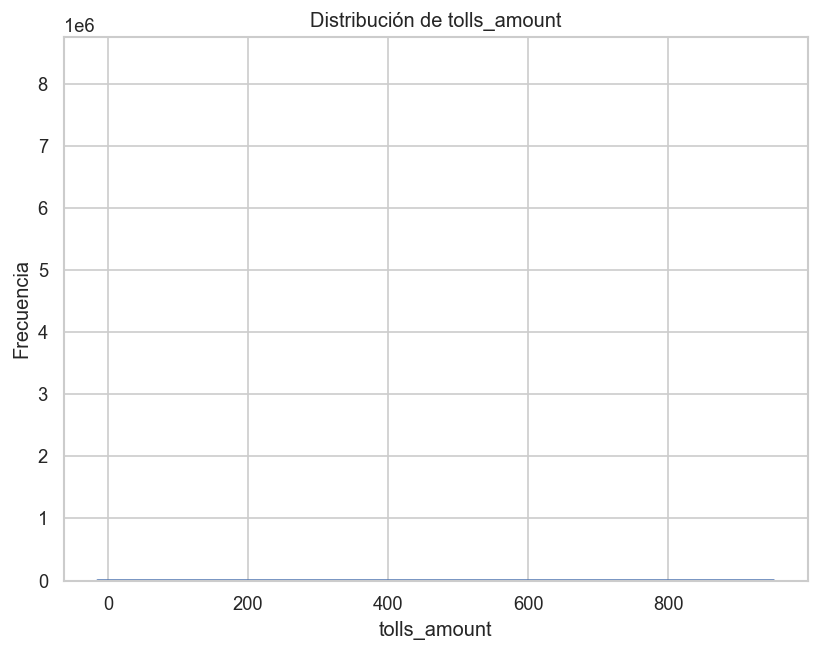

In [132]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'tolls_amount',data=df,binwidth=0.5,kde=True)
plt.ylabel('Frecuencia')
plt.title('Distribución de tolls_amount')
plt.show()

In [136]:
df[df.tolls_amount != 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
42,1,2018-01-01 00:23:44,2018-01-01 00:52:12,1,7.30,1,N,90,82,1,26.5,0.5,0.5,1.00,5.76,0.3,34.56,NaN,NaN
104,1,2018-01-01 00:49:19,2018-01-01 01:11:58,2,9.10,1,N,138,238,1,28.0,0.5,0.5,7.00,5.76,0.3,42.06,NaN,NaN
147,2,2018-01-01 00:37:31,2018-01-01 01:24:24,1,22.07,5,N,132,265,1,113.0,0.0,0.0,24.76,10.50,0.3,148.56,NaN,NaN
150,1,2018-01-01 00:40:13,2018-01-01 01:31:28,2,16.40,1,N,186,205,2,54.0,0.5,0.5,0.00,5.76,0.3,61.06,NaN,NaN
173,1,2018-01-01 00:58:09,2018-01-01 01:35:58,2,24.00,1,N,132,220,1,65.5,0.5,0.5,18.10,5.76,0.3,90.66,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8760594,1,2018-01-31 23:30:37,2018-01-31 23:49:09,1,8.00,1,N,138,162,1,24.5,0.5,0.5,6.30,5.76,0.3,37.86,NaN,NaN
8760612,1,2018-01-31 23:24:36,2018-02-01 00:07:51,1,19.10,2,N,132,90,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,NaN,NaN
8760639,1,2018-01-31 23:13:17,2018-01-31 23:32:00,1,10.80,1,N,142,200,1,30.5,0.5,0.5,3.44,2.64,0.3,37.88,NaN,NaN
8760669,2,2018-01-31 23:25:02,2018-01-31 23:55:33,1,10.69,1,N,138,230,1,34.5,0.5,0.5,5.00,5.76,0.3,46.56,NaN,NaN


In [137]:
IQR = df.tolls_amount.quantile(.75) - df.tolls_amount.quantile(.25)
min = df.tolls_amount.quantile(.25) - (1.5 * IQR)
max = df.tolls_amount.quantile(.75) + (1.5 * IQR)

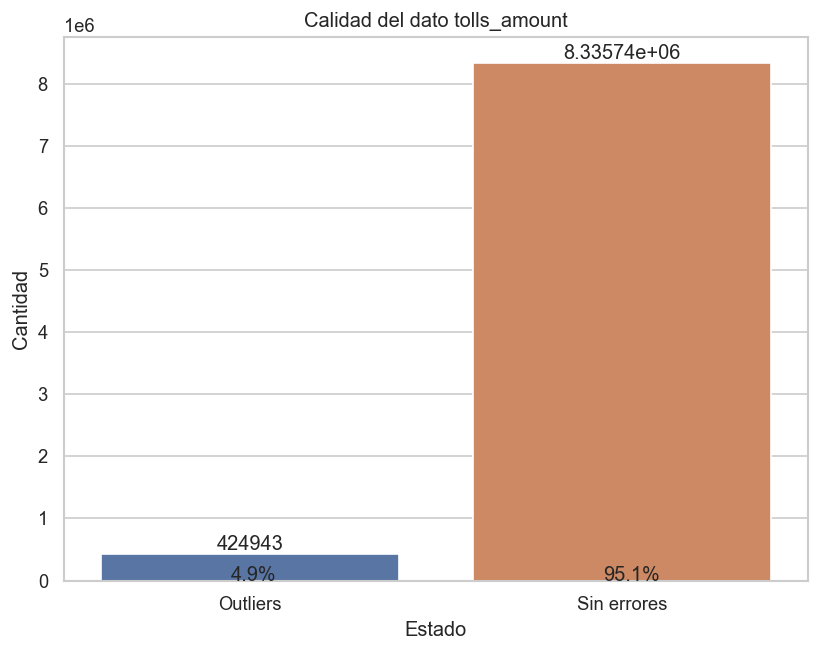

In [140]:
dic_calidad =  {'Outliers': df.tolls_amount[df.tolls_amount < min].count() + df.tolls_amount[df.tolls_amount > max].count(),
                'Sin errores': df.tolls_amount.count() - (df.tolls_amount[df.tolls_amount < min].count() + df.tolls_amount[df.tolls_amount > max].count())}
df_calidad = pd.DataFrame(list(dic_calidad.items()),columns = ['Estado', 'Cantidad'])
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.barplot(x = df_calidad['Estado'],y = 'Cantidad', data = df_calidad)
plt.bar_label(splot.containers[0])
without_hue (splot,df.trip_distance,0.05)
plt.title('Calidad del dato tolls_amount')
plt.show()

n) Campo improvement_surcharge

In [141]:
df.improvement_surcharge.unique()

array([ 0.3, -0.3,  0. ,  1. ])

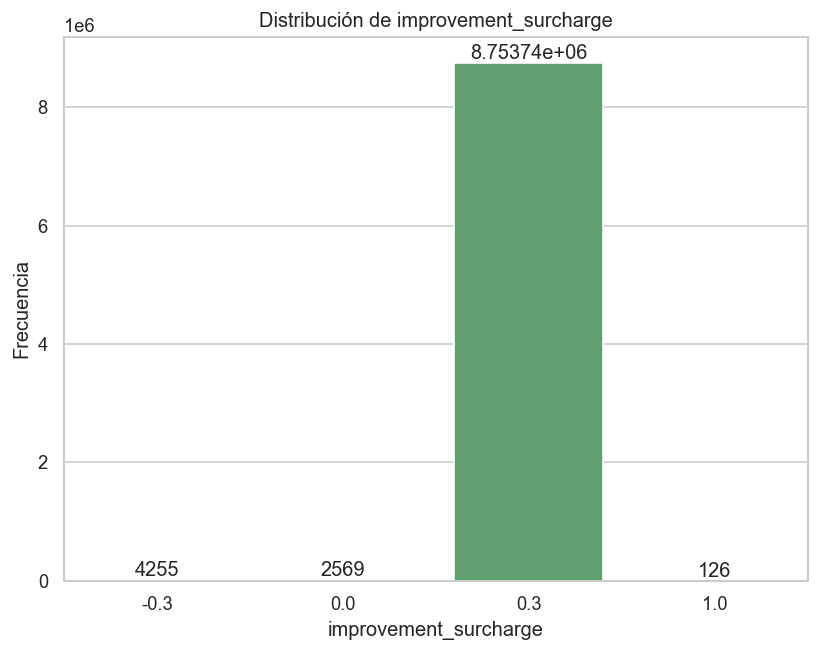

In [143]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.countplot(x = 'improvement_surcharge',data=df)
plt.bar_label(splot.containers[0])
plt.ylabel('Frecuencia')
plt.title('Distribución de improvement_surcharge')
plt.show()

o) Campo total_amount

In [144]:
df.total_amount.describe()

count    8.760687e+06
mean     1.549109e+01
std      1.419546e+01
min     -4.503000e+02
25%      8.300000e+00
50%      1.130000e+01
75%      1.662000e+01
max      8.016800e+03
Name: total_amount, dtype: float64

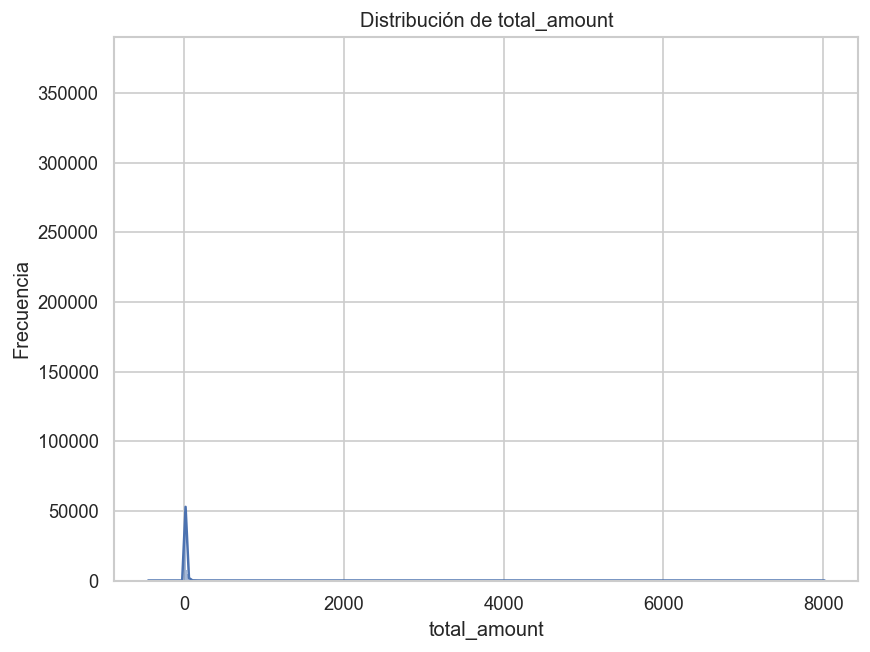

In [145]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'total_amount',data=df,binwidth=0.25,kde=True)
plt.ylabel('Frecuencia')
plt.title('Distribución de total_amount')
plt.show()

In [146]:
IQR = df.total_amount.quantile(.75) - df.total_amount.quantile(.25)
min = df.total_amount.quantile(.25) - (1.5 * IQR)
max = df.total_amount.quantile(.75) + (1.5 * IQR)

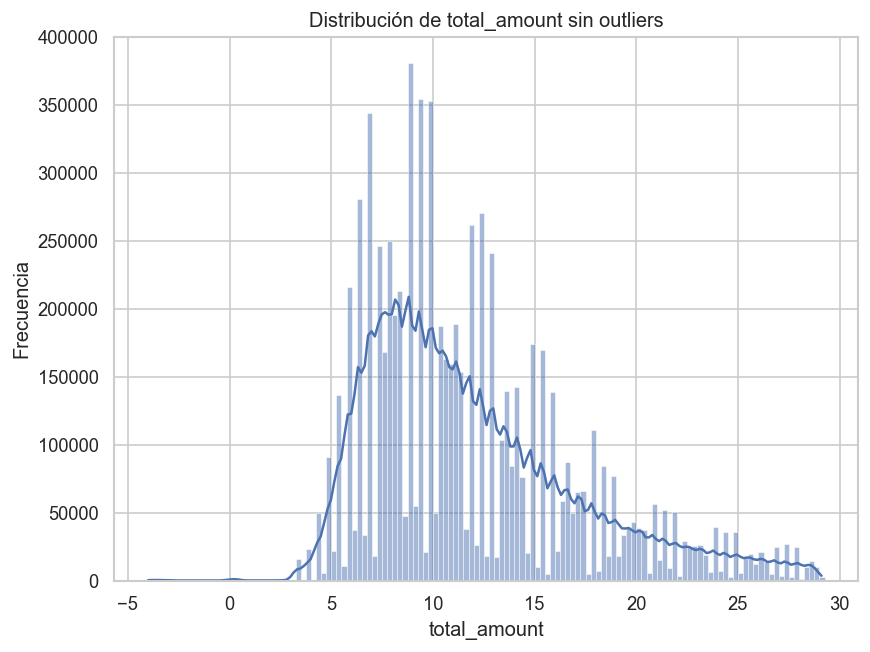

In [148]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'total_amount',data=df[(df.total_amount >= min) & (df.total_amount <= max)],binwidth=0.25,kde=True)
plt.ylabel('Frecuencia')
plt.title('Distribución de total_amount sin outliers')
plt.show()

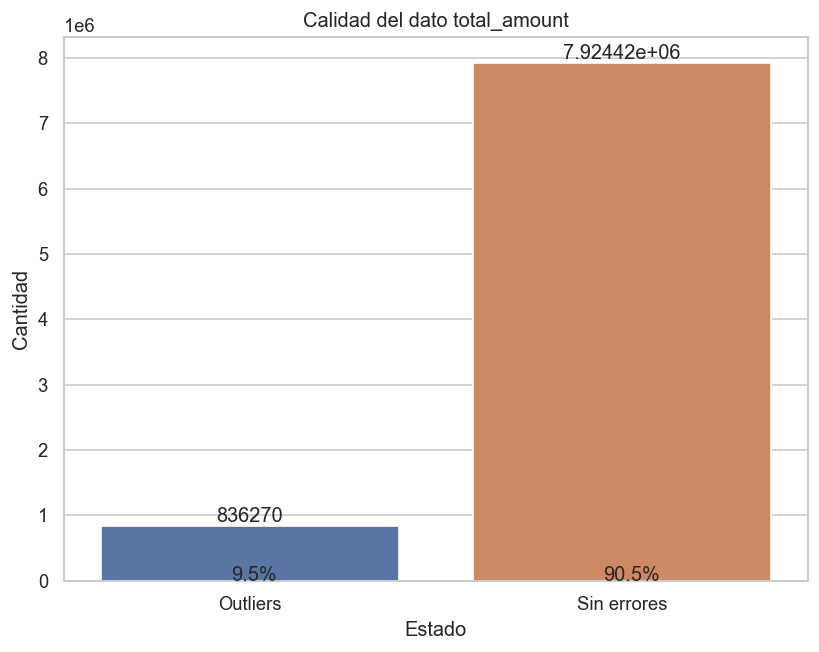

In [149]:
dic_calidad =  {'Outliers': df.total_amount[df.total_amount < min].count() + df.total_amount[df.total_amount > max].count(),
                'Sin errores': df.total_amount.count() - (df.total_amount[df.total_amount < min].count() + df.total_amount[df.total_amount > max].count())}
df_calidad = pd.DataFrame(list(dic_calidad.items()),columns = ['Estado', 'Cantidad'])
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.barplot(x = df_calidad['Estado'],y = 'Cantidad', data = df_calidad)
plt.bar_label(splot.containers[0])
without_hue (splot,df.trip_distance,0.05)
plt.title('Calidad del dato total_amount')
plt.show()

p) Campo congestion_surcharge

In [151]:
df.congestion_surcharge.unique()

array([nan, 2.5])

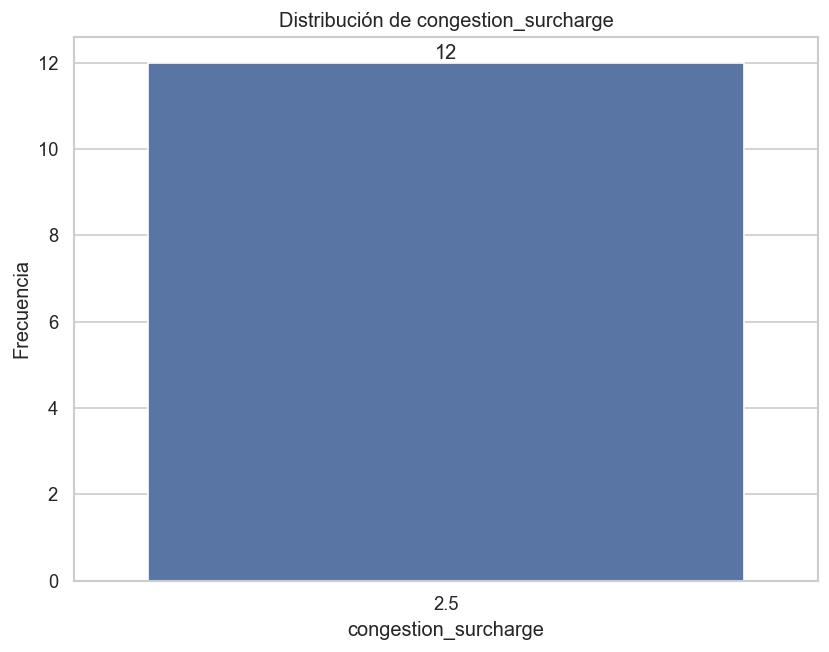

In [152]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.countplot(x = 'congestion_surcharge',data=df)
plt.bar_label(splot.containers[0])
plt.ylabel('Frecuencia')
plt.title('Distribución de congestion_surcharge')
plt.show()

q) Campo airport_fee

In [155]:
df.airport_fee.unique()

array([nan,  0.])

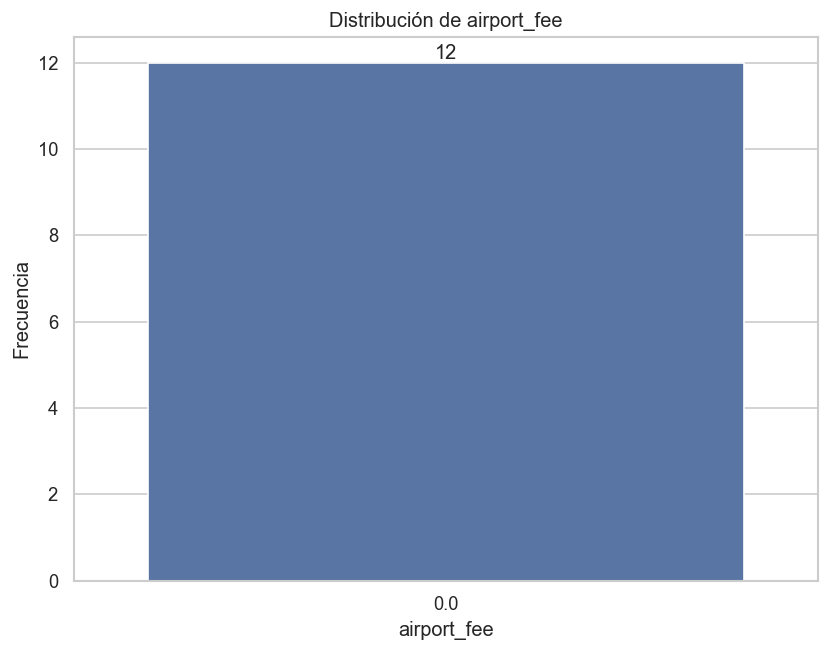

In [156]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.countplot(x = 'airport_fee',data=df)
plt.bar_label(splot.containers[0])
plt.ylabel('Frecuencia')
plt.title('Distribución de airport_fee')
plt.show()

### Paso 4: Consideraciones finales

Relación entre trip_distance (distancia de viaje) y fare_amount (tarifa inicial)

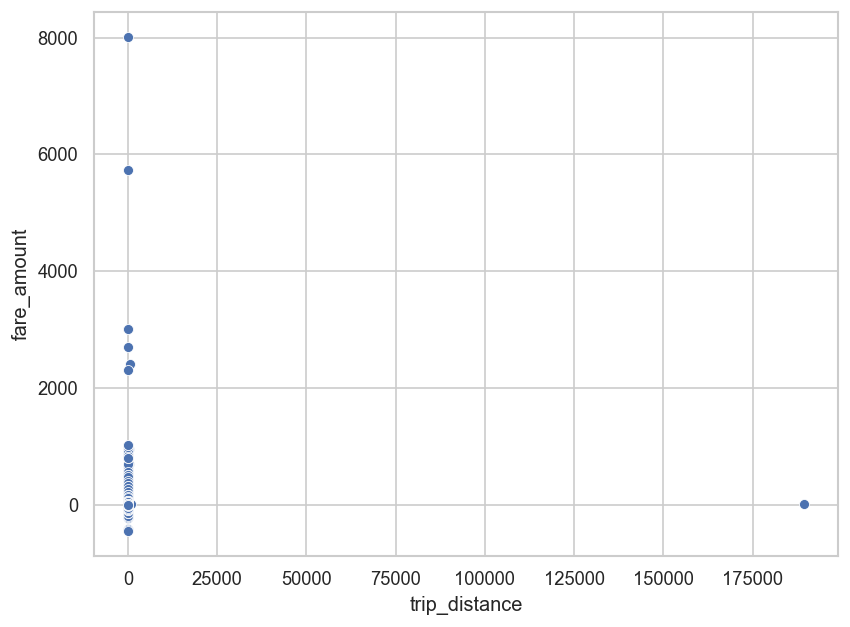

In [16]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.scatterplot(x = 'trip_distance',y = 'fare_amount', data=df)
plt.show()

Debido a la presencia de outliers, no se puede apreciar bien la relación entre estas dos variables. Se acotó entonces el rango a distancias de viaje entre o y 100 millas y tarifa inicial entre 0 y 500 USD

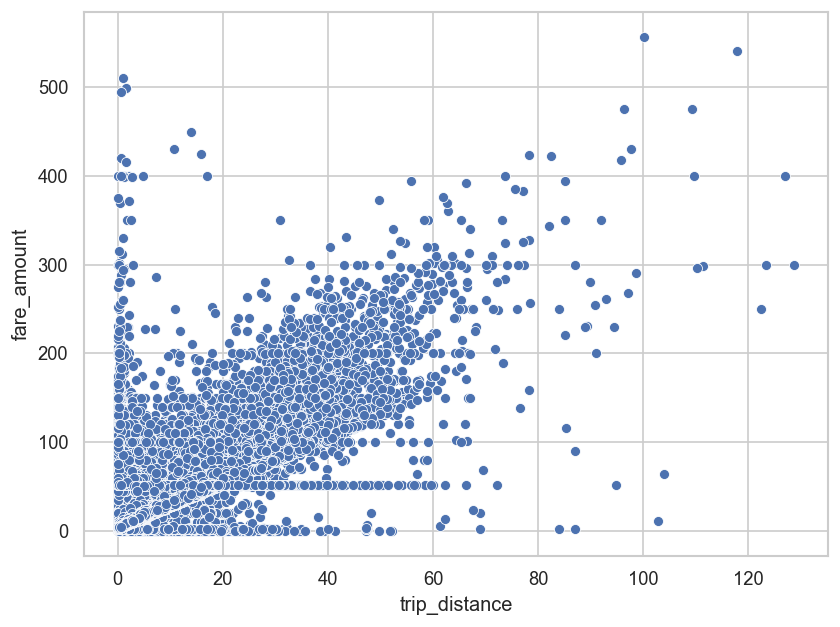

In [6]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.scatterplot(x = 'trip_distance',y = 'fare_amount', data=df[(df.trip_distance > 0) & (df.trip_distance < 130) & (df.fare_amount > 0) & (df.fare_amount < 550)])
plt.show()

Se puede apreciar que existe en general una tendencia lineal creciente, pero aún así, hay ciertos patrones que se escapan de esta tendencia. En primer lugar, altas tarifas con cortas distancias, y en segundo lugar, bajas tarifas con largas distancias

En base a lo realizado anteriormente, se han realizado las siguientes consideraciones:
- Las columnas congestion_surcharge y airport_fee representan menos de 1% del total de datos. Los pocos datos no nulos ya están contemplados en la columna extra, de modo que se pueden descartar.
- Se desestimarán los registros de viajes con 7, 8, y 9 pasajeros. Se colocará 1 pasajero en aquellos viajes con 0 pasajeros
- Se realizará un trim de los datos para la carga inicial. Se propone mantener el 90% de los datos cuyo fare_amount está comprendida entre los percentiles 5 y 95


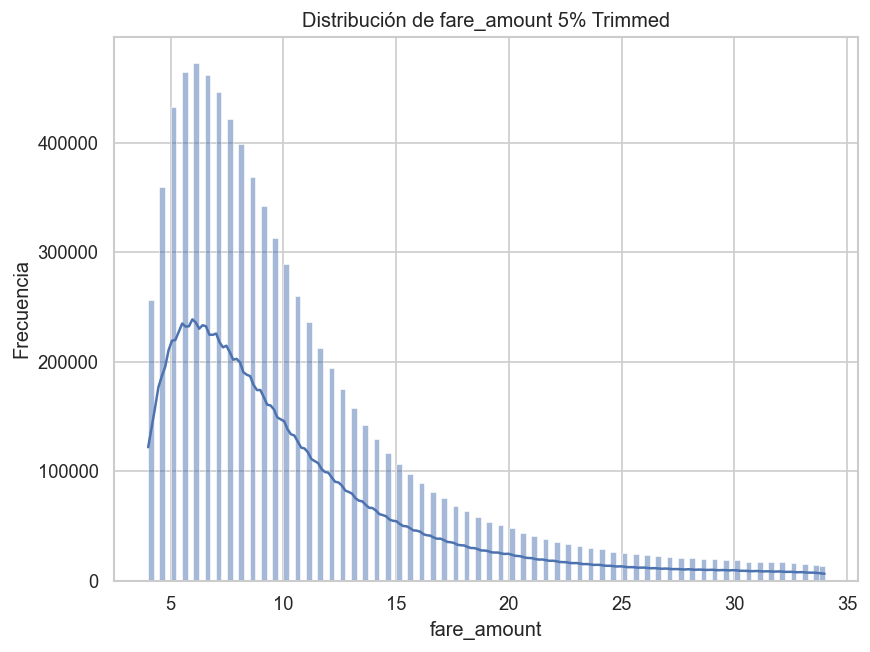

In [3]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'fare_amount',data=df[(df.fare_amount >= df.fare_amount.quantile(.05)) & (df.fare_amount <= df.fare_amount.quantile(.95))],binwidth=0.25,kde=True)
plt.ylabel('Frecuencia')
plt.title('Distribución de fare_amount 5% Trimmed')
plt.show()